In [326]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from datetime import datetime
from sklearn.datasets import load_breast_cancer
main_start = datetime.now()
%matplotlib inline

In [327]:
raw_data = load_breast_cancer()

In [328]:
data = np.c_[raw_data.data, raw_data.target]
columns = np.append(raw_data.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)

df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


In [329]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [330]:
# Benign = 1.0, Malignant = 0.0
df['target'].value_counts()


1.0    357
0.0    212
Name: target, dtype: int64

In [331]:
# Balance the data
Malignant = df[df['target'] == 0.0]
Benign = df[df['target'] == 1.0]

Benign = resample(Benign, n_samples=212)

df = Benign.append(Malignant)
print(df['target'].value_counts())

0.0    212
1.0    212
Name: target, dtype: int64


In [332]:
X = df.drop(['target'], 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(y_train.value_counts())
print('\n')
print(y_test.value_counts())


0.0    148
1.0    136
Name: target, dtype: int64


1.0    76
0.0    64
Name: target, dtype: int64


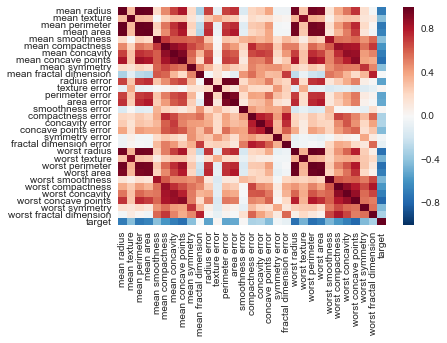

In [333]:
sns.heatmap(df.corr())

In [334]:
#There is an issue with multicollinearity with so many potential features with a high correlation. 
# One way to deal with that is through Principle Component Analysis creating new features from the variance outside the noise.
#Set up our first X using PCA
pca = PCA(n_components=6)
X_std_pca = pca.fit_transform(X_train)
X1 = pd.DataFrame(X_std_pca)

#Now for the Test
pca = PCA(n_components=6)
X_std_pca = pca.fit_transform(X_test)
X1_test = pd.DataFrame(X_std_pca)


In [335]:
start = datetime.now()
#Use Lasso/RFE with Cross Validation to get the best features for our second X
lr = LogisticRegression(C=1, penalty='l1')

#Set up our X,y
X = X_train
y = y_train

#Set up our Recursive Feature Elimination
rfe = RFECV(lr,cv=5) 
fit = rfe.fit(X,y)
result_RFE = pd.DataFrame(list(zip(X.head(0), rfe.ranking_, rfe.support_)),
                          columns=['Features','Ranking','Support'] ) 
print(result_RFE.sort_values('Ranking'))
print('It took the following time to complete this task:', datetime.now() - start)

                   Features  Ranking  Support
0               mean radius        1     True
22          worst perimeter        1     True
21            worst texture        1     True
26          worst concavity        1     True
1              mean texture        1     True
20             worst radius        2    False
11            texture error        3    False
13               area error        4    False
23               worst area        5    False
2            mean perimeter        6    False
3                 mean area        7    False
25        worst compactness        8    False
19  fractal dimension error        9    False
18           symmetry error       10    False
8             mean symmetry       11    False
7       mean concave points       12    False
17     concave points error       13    False
6            mean concavity       14    False
16          concavity error       15    False
5          mean compactness       16    False
4           mean smoothness       

In [336]:
#Let's extract the answers RFECV came up with to put into our models below.
true_values = result_RFE[result_RFE.Support == True]
feature_list = []
for g in true_values['Features']:
    feature_list.append(g)


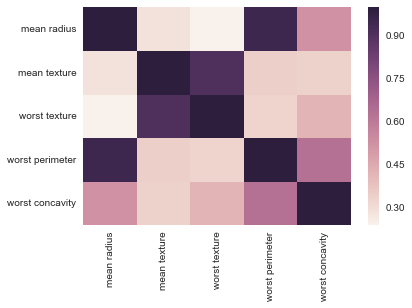

In [337]:
#Let's see how these features interact.
sns.heatmap(X_train[feature_list].corr())

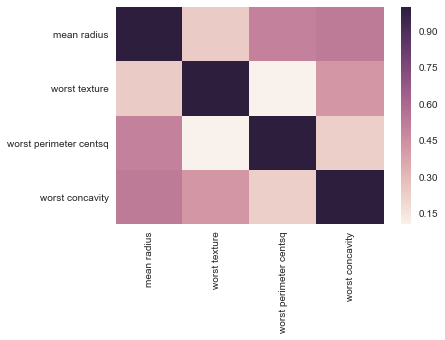

In [338]:
#There is a strong correlation between two of the features, so let's center and square one of them and stick it back in.

X_train['worst perimeter centsq'] = (X_train['worst perimeter'] - np.mean(df['worst perimeter'])) ** 2
X_test['worst perimeter centsq'] = (X_test['worst perimeter'] - np.mean(df['worst perimeter'])) ** 2
feature_list = ['mean radius', 'worst texture', 'worst perimeter centsq', 'worst concavity']
sns.heatmap(X_train[feature_list].corr())

In [339]:
X2 = X_train[feature_list]
X2_test = X_test[feature_list]

In [340]:
# Let's use Random Forest to select features.
start = datetime.now()
X = X_train
y = y_train
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
df2 = X.columns.get_values()
feat_labels = df2.tolist()

# Train the classifier
clf.fit(X, y)
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
for feature in zip(X, clf.feature_importances_):
    print(feature)

print('It took the following time to complete this task:', datetime.now() - start)

('mean radius', 0.026049230429078203)
('mean texture', 0.015394881813054356)
('mean perimeter', 0.034247415442023969)
('mean area', 0.027149164536056997)
('mean smoothness', 0.0063737799172334311)
('mean compactness', 0.017535801558210051)
('mean concavity', 0.088401335484875831)
('mean concave points', 0.12524345092561481)
('mean symmetry', 0.010289864581631713)
('mean fractal dimension', 0.0050626309532925675)
('radius error', 0.013204182161869348)
('texture error', 0.0036616417618589359)
('perimeter error', 0.016614409947630221)
('area error', 0.039376721810543969)
('smoothness error', 0.0051237665899851546)
('compactness error', 0.0048499881937402308)
('concavity error', 0.0073757404598607202)
('concave points error', 0.0063770634459054138)
('symmetry error', 0.0038383350445597513)
('fractal dimension error', 0.0049709443571652849)
('worst radius', 0.082621822567704631)
('worst texture', 0.016109514863995252)
('worst perimeter', 0.10428601044097342)
('worst area', 0.078896835204836

In [341]:
start = datetime.now()
sfm = SelectFromModel(clf, threshold=0.05)
rfcfeature_list =[]
# Train the selector
sfm.fit(X, y)
for feature_list_index in sfm.get_support(indices=True):
    rfcfeature_list.append(feat_labels[feature_list_index])
    print(feat_labels[feature_list_index])
    
print('Number of features in this list: {}'.format(len(rfcfeature_list)))
print('It took the following time to complete this task:', datetime.now() - start)

mean concavity
mean concave points
worst radius
worst perimeter
worst area
worst concavity
worst concave points
Number of features in this list: 7
It took the following time to complete this task: 0:00:02.263860


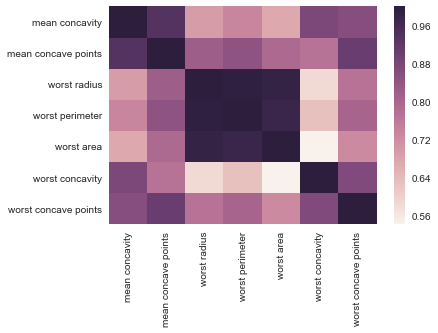

In [342]:
sns.heatmap(df[rfcfeature_list].corr())

In [343]:
#Let's go ahead a replace worst perimeter again with worst perimeter centsq
rfcfeature_list = ['mean perimeter', 'mean concave points', 'worst radius', 'worst perimeter centsq', 
                  'worst area', 'worst concavity', 'worst concave points']

In [344]:
X3 = X_train[rfcfeature_list]
X3_test = X_test[rfcfeature_list]
  

In [345]:
#Make a list to store our results for a comparison at the end
results = pd.DataFrame(index=range(21))
results['Model'] = ['Logistic Regression',
                    'Logistic Regression',
                    'Logistic Regression',
                    'Lasso Regression',
                    'Lasso Regression',
                    'Lasso Regression',
                    'Ridge Regression',
                    'Ridge Regression',
                    'Ridge Regression',
                    'KNN', 'KNN', 'KNN',
                    'SVC', 'SVC', 'SVC',
                    'Random Forest',
                    'Random Forest',
                    'Random Forest',
                    'Gradient Booster',
                    'Gradient Booster',
                    'Gradient Booster',
                    ]
results['Feature Selection'] = ['PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest']


Train_Score = []
Test_Score = []
Cross_Validation = []
fold1 = []
fold2 = []
fold3 = []
fold4 = []
fold5 = []

In [346]:
#Create a testing function that will fit the test with PCA and our selected features from both RFECV and Random Forest
def testing_func(test):
    #Fit the models
    test.fit(X1, y)
    #Generate the score
    score1 = test.score(X1, y)
    #Put that score into a list we can use later to compare results.
    Train_Score.append(score1)
    #Rinse and repeat
    test.fit(X1_test, y_test)
    score2 = test.score(X1_test, y_test)
    Test_Score.append(score2)
    test.fit(X2, y)
    score3 = test.score(X2, y)
    Train_Score.append(score3)
    test.fit(X2_test, y_test)
    score4 = test.score(X2_test, y_test)
    Test_Score.append(score4)
    test.fit(X3, y)
    score5 = test.score(X3, y)
    Train_Score.append(score5)
    test.fit(X3_test, y_test)
    score6 = test.score(X3_test, y_test)
    Test_Score.append(score6)

    # Print out the results.
    print('\nR-squared for the training set with PCA:')
    print(score1)
    print('\nR-squared for the test set with PCA:')
    print(score2)
    
    #Check with Cross Validation
    Cross_Validation0 = cross_val_score(test, X1, y, cv=5)
    print('\nCross Validation Score with 5 folds with PCA:\n{}'.format(Cross_Validation0))
    Cross_Validation.append(Cross_Validation0)
    
    #Break up the cross validation results into seperate lists to be put into our data frame for comparison later.
    fold1.append(Cross_Validation0[0])
    fold2.append(Cross_Validation0[1])
    fold3.append(Cross_Validation0[2])
    fold4.append(Cross_Validation0[3])
    fold5.append(Cross_Validation0[4])
    print('\nR-squared for the training set with RFECV generated features:')
    print(score3)
    print('\nR-squared for the test set with RFECV generated features:')
    print(score4)
    Cross_Validation0 = cross_val_score(test, X2, y, cv=5)
    print('\nCross Validation Score with 5 folds with RFECV generated features:\n{}'.format(Cross_Validation0))
    Cross_Validation.append(Cross_Validation0)
    fold1.append(Cross_Validation0[0])
    fold2.append(Cross_Validation0[1])
    fold3.append(Cross_Validation0[2])
    fold4.append(Cross_Validation0[3])
    fold5.append(Cross_Validation0[4])
    print('\nR-squared for the training set with Random Forest generated features:')
    print(score5)
    print('\nR-squared for the test set with Random Forest generated features:')
    print(score6)
    Cross_Validation0 = cross_val_score(test, X3, y, cv=5)
    print('\nCross Validation Score with 5 folds with PCA:\n{}'.format(Cross_Validation0))
    Cross_Validation.append(Cross_Validation0)
    fold1.append(Cross_Validation0[0])
    fold2.append(Cross_Validation0[1])
    fold3.append(Cross_Validation0[2])
    fold4.append(Cross_Validation0[3])
    fold5.append(Cross_Validation0[4])


In [347]:
start = datetime.now()
#Let's compare our features in various models starting with Logistic Regression
lr = LogisticRegression(C=9e9)
testing_func(lr)

print('It took the following time to complete this task:', datetime.now() - start)


R-squared for the training set with PCA:
0.957746478873

R-squared for the test set with PCA:
0.985714285714

Cross Validation Score with 5 folds with PCA:
[ 0.9137931   0.9122807   0.98245614  0.98214286  0.91071429]

R-squared for the training set with RFECV generated features:
0.94014084507

R-squared for the test set with RFECV generated features:
0.95

Cross Validation Score with 5 folds with RFECV generated features:
[ 0.96551724  0.89473684  0.96491228  0.98214286  0.89285714]

R-squared for the training set with Random Forest generated features:
0.947183098592

R-squared for the test set with Random Forest generated features:
0.935714285714

Cross Validation Score with 5 folds with PCA:
[ 0.9137931   0.92982456  0.98245614  0.96428571  0.91071429]
It took the following time to complete this task: 0:00:00.067295


In [348]:
start = datetime.now()
#Let's pop those into the model
lr = LogisticRegression(C=1, penalty='l1')
testing_func(lr)

print('It took the following time to complete this task:', datetime.now() - start)


R-squared for the training set with PCA:
0.961267605634

R-squared for the test set with PCA:
0.985714285714

Cross Validation Score with 5 folds with PCA:
[ 0.9137931   0.9122807   0.96491228  0.98214286  0.94642857]

R-squared for the training set with RFECV generated features:
0.94014084507

R-squared for the test set with RFECV generated features:
0.935714285714

Cross Validation Score with 5 folds with RFECV generated features:
[ 0.96551724  0.89473684  0.98245614  0.96428571  0.89285714]

R-squared for the training set with Random Forest generated features:
0.933098591549

R-squared for the test set with Random Forest generated features:
0.928571428571

Cross Validation Score with 5 folds with PCA:
[ 0.9137931   0.89473684  0.98245614  0.96428571  0.91071429]
It took the following time to complete this task: 0:00:00.095071


In [349]:
start = datetime.now()
#Let's pop those into the model
lr = LogisticRegression(C=1, penalty='l2')
testing_func(lr)

print('It took the following time to complete this task:', datetime.now() - start)


R-squared for the training set with PCA:
0.957746478873

R-squared for the test set with PCA:
0.985714285714

Cross Validation Score with 5 folds with PCA:
[ 0.9137931   0.9122807   0.98245614  0.98214286  0.94642857]

R-squared for the training set with RFECV generated features:
0.933098591549

R-squared for the test set with RFECV generated features:
0.885714285714

Cross Validation Score with 5 folds with RFECV generated features:
[ 0.89655172  0.85964912  0.92982456  0.94642857  0.92857143]

R-squared for the training set with Random Forest generated features:
0.915492957746

R-squared for the test set with Random Forest generated features:
0.9

Cross Validation Score with 5 folds with PCA:
[ 0.9137931   0.85964912  0.9122807   0.96428571  0.92857143]
It took the following time to complete this task: 0:00:00.070521


In [350]:
start = datetime.now()
neighbors = KNeighborsClassifier(n_neighbors=5)
testing_func(neighbors)

print('It took the following time to complete this task:', datetime.now() - start)


R-squared for the training set with PCA:
0.93661971831

R-squared for the test set with PCA:
0.95

Cross Validation Score with 5 folds with PCA:
[ 0.93103448  0.84210526  0.92982456  0.94642857  0.91071429]

R-squared for the training set with RFECV generated features:
0.75

R-squared for the test set with RFECV generated features:
0.735714285714

Cross Validation Score with 5 folds with RFECV generated features:
[ 0.63793103  0.64912281  0.61403509  0.60714286  0.67857143]

R-squared for the training set with Random Forest generated features:
0.922535211268

R-squared for the test set with Random Forest generated features:
0.935714285714

Cross Validation Score with 5 folds with PCA:
[ 0.9137931   0.89473684  0.89473684  0.85714286  0.875     ]
It took the following time to complete this task: 0:00:00.078593


In [351]:
start = datetime.now()
#Now let's model with SVM
svc = SVC()
testing_func(svc)

print('It took the following time to complete this task:', datetime.now() - start)


R-squared for the training set with PCA:
1.0

R-squared for the test set with PCA:
1.0

Cross Validation Score with 5 folds with PCA:
[ 0.72413793  0.64912281  0.66666667  0.67857143  0.64285714]

R-squared for the training set with RFECV generated features:
1.0

R-squared for the test set with RFECV generated features:
1.0

Cross Validation Score with 5 folds with RFECV generated features:
[ 0.74137931  0.66666667  0.66666667  0.67857143  0.67857143]

R-squared for the training set with Random Forest generated features:
1.0

R-squared for the test set with Random Forest generated features:
1.0

Cross Validation Score with 5 folds with PCA:
[ 0.72413793  0.64912281  0.66666667  0.67857143  0.64285714]
It took the following time to complete this task: 0:00:00.120680


In [352]:
parameters = {'C':[1,2,3,4,5,6,7,8,9,10], 'gamma': 
              [0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}
grid = GridSearchCV(svc, parameters)
grid.fit(X1, y)
predicted = grid.predict(X1_test)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

The best parameters are {'C': 2, 'gamma': 0.01} with a score of %0.7394366197183099


In [353]:
start = datetime.now()
#Now let's model with Random Forest
rfc = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, 
                                      min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=2, min_impurity_decrease=0.0, min_impurity_split=None, 
                                      bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                                      warm_start=False, class_weight=None)

testing_func(rfc)

print('It took the following time to complete this task:', datetime.now() - start)


R-squared for the training set with PCA:
0.922535211268

R-squared for the test set with PCA:
0.807142857143

Cross Validation Score with 5 folds with PCA:
[ 0.9137931   0.8245614   0.87719298  0.92857143  0.85714286]

R-squared for the training set with RFECV generated features:
0.919014084507

R-squared for the test set with RFECV generated features:
0.907142857143

Cross Validation Score with 5 folds with RFECV generated features:
[ 0.82758621  0.89473684  0.85964912  0.875       0.91071429]

R-squared for the training set with Random Forest generated features:
0.933098591549

R-squared for the test set with Random Forest generated features:
0.921428571429

Cross Validation Score with 5 folds with PCA:
[ 0.93103448  0.8245614   0.87719298  0.96428571  0.91071429]
It took the following time to complete this task: 0:00:00.476859


In [354]:
start = datetime.now()
#Now let's model with Gradient Boosting
clf = GradientBoostingClassifier(loss='exponential', learning_rate=1.0, n_estimators=5, subsample=1.0, 
                                          criterion='friedman_mse', min_samples_split=4, min_samples_leaf=1, 
                                          min_weight_fraction_leaf=0.0, max_depth=2, min_impurity_decrease=0.0, 
                                          min_impurity_split=None, init=None, random_state=None, max_features=None, 
                                          verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')

testing_func(clf)

print('It took the following time to complete this task:', datetime.now() - start)


R-squared for the training set with PCA:
0.982394366197

R-squared for the test set with PCA:
0.992857142857

Cross Validation Score with 5 folds with PCA:
[ 0.89655172  0.89473684  0.94736842  0.94642857  0.82142857]

R-squared for the training set with RFECV generated features:
0.957746478873

R-squared for the test set with RFECV generated features:
0.978571428571

Cross Validation Score with 5 folds with RFECV generated features:
[ 0.9137931   0.87719298  0.9122807   0.94642857  0.92857143]

R-squared for the training set with Random Forest generated features:
0.957746478873

R-squared for the test set with Random Forest generated features:
0.978571428571

Cross Validation Score with 5 folds with PCA:
[ 0.89655172  0.92982456  0.89473684  0.94642857  0.91071429]
It took the following time to complete this task: 0:00:00.147839


In [355]:
results['Train Score'] = Train_Score
results['Test Score'] = Test_Score
results['CV Fold 1'] = fold1
results['CV Fold 2'] = fold2
results['CV Fold 3'] = fold3
results['CV Fold 4'] = fold4
results['CV Fold 5'] = fold5
results.head(21)

,Model,Feature Selection,Train Score,Test Score,CV Fold 1,CV Fold 2,CV Fold 3,CV Fold 4,CV Fold 5
0,Logistic Regression,PCA,0.957746,0.985714,0.913793,0.912281,0.982456,0.982143,0.910714
1,Logistic Regression,RFECV,0.940141,0.950000,0.965517,0.894737,0.964912,0.982143,0.892857
2,Logistic Regression,Random Forest,0.947183,0.935714,0.913793,0.929825,0.982456,0.964286,0.910714
3,Lasso Regression,PCA,0.961268,0.985714,0.913793,0.912281,0.964912,0.982143,0.946429
4,Lasso Regression,RFECV,0.940141,0.935714,0.965517,0.894737,0.982456,0.964286,0.892857
5,Lasso Regression,Random Forest,0.933099,0.928571,0.913793,0.894737,0.982456,0.964286,0.910714
6,Ridge Regression,PCA,0.957746,0.985714,0.913793,0.912281,0.982456,0.982143,0.946429
7,Ridge Regression,RFECV,0.933099,0.885714,0.896552,0.859649,0.929825,0.946429,0.928571
8,Ridge Regression,Random Forest,0.915493,0.900000,0.913793,0.859649,0.912281,0.964286,0.928571
9,KNN,PCA,0.936620,0.950000,0.931034,0.842105,0.929825,0.946429,0.910714


In [356]:
results.describe()

,Train Score,Test Score,CV Fold 1,CV Fold 2,CV Fold 3,CV Fold 4,CV Fold 5
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.941315,0.938095,0.874384,0.841270,0.880535,0.894558,0.858844
std,0.051103,0.066522,0.089280,0.097912,0.119713,0.121232,0.102722
min,0.750000,0.735714,0.637931,0.649123,0.614035,0.607143,0.642857
25%,0.933099,0.921429,0.896552,0.824561,0.877193,0.875000,0.857143
50%,0.940141,0.950000,0.913793,0.894737,0.912281,0.946429,0.910714
75%,0.957746,0.985714,0.913793,0.894737,0.964912,0.964286,0.910714
max,1.000000,1.000000,0.965517,0.929825,0.982456,0.982143,0.946429


SVC, Random Forest, and Gradient Booster all overfit the model, with SVC the worst offender with the lowest Cross Validation Scores across the board. KNN also showed signs of overfitting. 

Logistic Regression Models (including Lasso and Ridge) showed the most consistent results with PCA. Of these, Lasso performed slightly better than the other two models.